Import the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

Import the dataset

In [4]:
dataset=pd.read_csv("IT21308598_preprocessed_weather.csv")
X=dataset.iloc[:,[i for i in range(13)if i!=7] ].values
Y=dataset.iloc[:,7:8].values

Spliit the data in to test and training

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.25, random_state=42)

scaling the features

Build the LSTM model

In [6]:
# Define the scaler for scaling the features
scaler = StandardScaler()

# Reshaping the data for LSTM (samples, time steps, features)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape to 3D arrays for LSTM input
x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], x_test_scaled.shape[1], 1))


In [7]:
# LSTM model for time-series data (weather prediction)
model = models.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train_scaled.shape[1], 1)))  # More units
model.add(layers.LSTM(50, return_sequences=False))  # Second LSTM layer
model.add(layers.Dense(50, activation='relu'))  # More neurons in Dense layer
model.add(layers.Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [8]:
# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [9]:
# Train the model with different batch size
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 64s 17ms/step - loss: 11.6007 - mae: 2.6500 - val_loss: 6.4138 - val_mae: 1.9439
Epoch 2/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - loss: 6.1420 - mae: 1.8071 - val_loss: 5.3686 - val_mae: 1.6202
Epoch 3/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 84s 16ms/step - loss: 5.4313 - mae: 1.6601 - val_loss: 5.0121 - val_mae: 1.5579
Epoch 4/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - loss: 5.2470 - mae: 1.6175 - val_loss: 5.0417 - val_mae: 1.6472
Epoch 5/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 80s 15ms/step - loss: 4.9286 - mae: 1.5524 - val_loss: 4.8044 - val_mae: 1.5227
Epoch 6/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - loss: 4.8539 - mae: 1.5212 - val_loss: 5.0389 - val_mae: 1.5993
Epoch 7/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - loss: 4.6876 - mae: 1.4883 - val_loss: 4.4987 - val_mae: 1.4596
Epoch 8/100
3328/3328 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - loss: 4.6373 - mae: 1.4767 - val_loss: 4.4460 - val_mae: 1.4371
Epoch 9/100
332

Train the model

In [10]:

# Reshaping the data for LSTM (samples, time steps, features)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Reshape to 3D arrays for LSTM input
x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], x_train_scaled.shape[1], 1))
x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], x_test_scaled.shape[1], 1))


Evaluate the model

In [11]:

y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R^2 Score on Test Set: {r2}")


694/694 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Mean Squared Error on Test Set: 2.8755429757821136
R^2 Score on Test Set: 0.7972627919047224


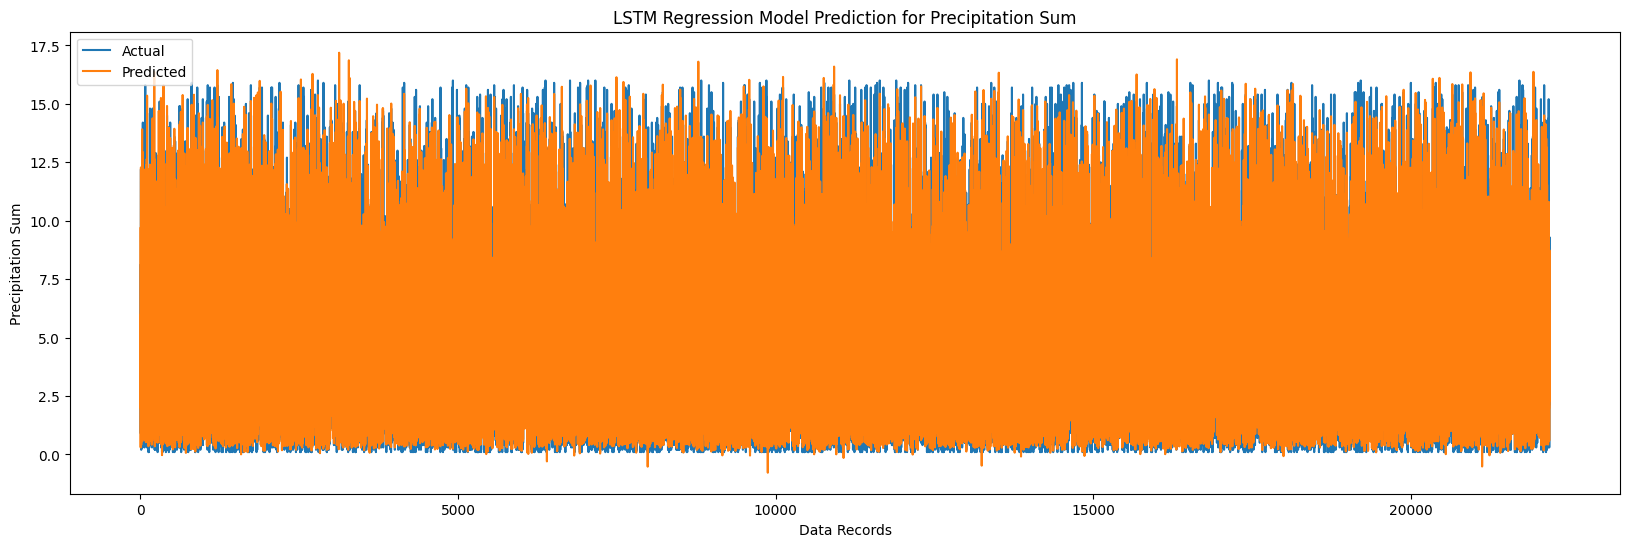

In [12]:
import matplotlib.pyplot as plt

# Plot the results of LSTM predictions
plt.figure(figsize=(20, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data Records')
plt.ylabel('Precipitation Sum')
plt.title('LSTM Regression Model Prediction for Precipitation Sum')  # Updated title for LSTM
plt.legend()
plt.show()
